In [1]:
from torchvision import transforms
import torch
from PIL import Image
from pytorch_transformers import GPT2Tokenizer, GPT2LMHeadModel


# Load pre-trained model tokenizer (vocabulary)
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Load pre-trained model (weights)
model = GPT2LMHeadModel.from_pretrained('gpt2')

# Set the model to evaluation mode to deactivate the DropOut modules
model.eval()

# Load image, resize and convert to tensor
img = Image.open("/Users/neylemke/Downloads/grid_0.png")
img = img.resize((256, 256))
img_t = transforms.ToTensor()(img)


""

ModuleNotFoundError: No module named 'pytorch_transformers'

In [28]:
# Build the input tensor
input_t = torch.zeros((1,1,256,256), dtype=torch.float32)
input_t[0,0] = img_t[0]



In [29]:
#print dimensions of torch tensor?
print(input_t[0,0].shape)

torch.Size([256, 256])


In [30]:

img_t[0]












tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])

In [21]:
?transforms.ToTensor

Init signature: transforms.ToTensor() -> None
Docstring:     
Convert a ``PIL Image`` or ``numpy.ndarray`` to tensor. This transform does not support torchscript.

Converts a PIL Image or numpy.ndarray (H x W x C) in the range
[0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0]
if the PIL Image belongs to one of the modes (L, LA, P, I, F, RGB, YCbCr, RGBA, CMYK, 1)
or if the numpy.ndarray has dtype = np.uint8

In the other cases, tensors are returned without scaling.

.. note::
    Because the input image is scaled to [0.0, 1.0], this transformation should not be used when
    transforming target image masks. See the `references`_ for implementing the transforms for image masks.

.. _references: https://github.com/pytorch/vision/tree/main/references/segmentation
File:           ~/Documents/GitHub/abstracts/.venv/lib/python3.10/site-packages/torchvision/transforms/transforms.py
Type:           type
Subclasses:     


In [31]:
# Generate a caption
with torch.no_grad():
    output = model(input_t)
    caption = tokenizer.decode(output[0], skip_special_tokens=True)
    print(caption)

RuntimeError: Expected tensor for argument #1 'indices' to have one of the following scalar types: Long, Int; but got torch.FloatTensor instead (while checking arguments for embedding)

In [17]:

?GPT2LMHeadModel


Init signature: GPT2LMHeadModel(config)
Docstring:     
The GPT2 Model transformer with a language modeling head on top
(linear layer with weights tied to the input embeddings).     OpenAI GPT-2 model was proposed in
    `Language Models are Unsupervised Multitask Learners`_
    by Alec Radford*, Jeffrey Wu*, Rewon Child, David Luan, Dario Amodei** and Ilya Sutskever**.
    It's a causal (unidirectional) transformer pre-trained using  language modeling on a very large
    corpus of ~40 GB of text data.

    This model is a PyTorch `torch.nn.Module`_ sub-class. Use it as a regular PyTorch Module and
    refer to the PyTorch documentation for all matter related to general usage and behavior.

    .. _`Language Models are Unsupervised Multitask Learners`:
        https://openai.com/blog/better-language-models/

    .. _`torch.nn.Module`:
        https://pytorch.org/docs/stable/nn.html#module

    Parameters:
        config (:class:`~pytorch_transformers.GPT2Config`): Model configuration c

In [5]:
#how to discover python version I am running on python notebook?
from platform import python_version

print(python_version())







import sys


3.10.9


In [11]:
#how to install package in python notebook
!{sys.executable} -m pip install opencv-python

  Using cached opencv_python-4.7.0.68-cp37-abi3-macosx_11_0_arm64.whl (31.1 MB)


In [1]:
import torch
from torch.nn.functional import softmax
from torchvision import transforms
from torchvision import models
from torch.nn.utils.rnn import pack_padded_sequence
from nltk.translate.meteor_score import meteor_score
import cv2
import matplotlib.pyplot as plt



In [2]:
# Load pre-trained SAT model
model = models.resnet152()
model.eval()

# Preprocess image
img = cv2.imread("/Users/neylemke/Downloads/grid_0.png")

In [4]:
#display image at jupyter?


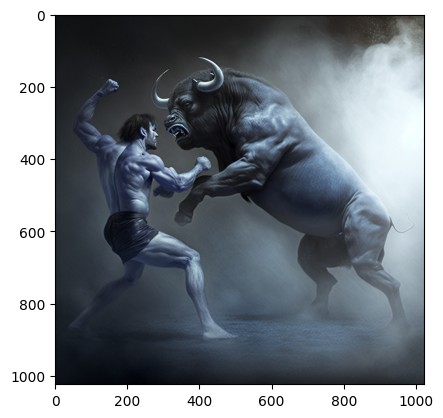

In [79]:
%matplotlib inline


In [3]:

#
# Preprocess image
img = cv2.imread("/Users/neylemke/Downloads/grid_0.png")

#img = cv2.resize(img, (224,224))
plt.imshow(img)
img = img.transpose(2, 0, 1)
transform = transforms.Compose([
transforms.ToTensor(),
transforms.Resize(256),
transforms.CenterCrop(size=224),
transforms.Normalize(mean = [0.485, 0.456, 0.406],
std = [0.229, 0.224, 0.225])
]
)

img2 = transform(img)


: 

: 

In [ ]:

# Forward pass image through the model
output = model(img2.unsqueeze(0))
output = softmax(output, dim=1)




In [ ]:
from pytorch_transformers import GPT2Tokenizer, GPT2LMHeadModel

# Load pre-trained model tokenizer (vocabulary)
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Load pre-trained model (weights)
language_model = GPT2LMHeadModel.from_pretrained('gpt2')

# Set the model to evaluation mode to deactivate the DropOut modules
language_model.eval()

# Generate a caption
with torch.no_grad():
    output = language_model(output)
    caption = tokenizer.decode(output[0], skip_special_tokens=True)
    print(caption)